<div class="alert alert-block alert-warning">

# Explore Exercises

In [1]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

from wrangle import acquire_zillow, get_zillow_data, wrangle_zillow, split_train_val_test

from explore import plot_variable_pairs, plot_categorical_and_continuous_vars

from evaluate import create_model, dataframe_model, plot_residuals, regression_errors, baseline_mean_errors, better_than_baseline

import os

<div class="alert alert-block alert-success">

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.


<div class="alert alert-block alert-info">

1. Load your zillow dataset.


In [2]:
df = get_zillow_data()
df = wrangle_zillow(df)

train, val, test = split_train_val_test(df)

train.shape, val.shape, test.shape

((1498164, 7), (321035, 7), (321036, 7))

In [3]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
1007466,3,2.0,1452,241012,1980,2974.81,6037
615622,3,2.0,1262,235630,1953,3029.22,6037
662507,3,1.0,1447,435123,1947,5226.67,6037
840040,3,2.0,1403,268770,1965,2849.62,6111
243798,3,2.0,1456,365000,1961,4582.48,6037


<div class="alert alert-block alert-info">

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

Here is some sample code to get you started:

from sklearn.linear_model import LinearRegression


In [4]:
# split into subsets for train and val
X_train = train[['area']]
y_train = train.tax_value

X_val = val[['area']]
y_val = val.tax_value

In [5]:
# Since we have no way of knowing if the median or the mean performs better, we'll use the median.
#y_train.median()

preds = pd.DataFrame({'y_actual': y_train,
                      'y_baseline': y_train.median()})

preds.head()

,y_actual,y_baseline
1007466,241012,328010.5
615622,235630,328010.5
662507,435123,328010.5
840040,268770,328010.5
243798,365000,328010.5


In [6]:
preds['y_baseline_minus_mean'] = preds['y_baseline'] - preds['y_actual'].mean()
preds.head()

,y_actual,y_baseline,y_baseline_minus_mean
1007466,241012,328010.5,-132489.819855
615622,235630,328010.5,-132489.819855
662507,435123,328010.5,-132489.819855
840040,268770,328010.5,-132489.819855
243798,365000,328010.5,-132489.819855


In [7]:
# set model varible to log ref.
#model = LinearRegression()

# fit the model
#lr.fit(X_train, y_train)

# assign the model and fit model
lr = LinearRegression().fit(X_train, y_train)

#save predictions
preds['y_hat'] = lr.predict(X_train)

<div class="alert alert-block alert-info">

3. Plot the residuals for the linear regression model that you made.


In [8]:
# y-hat resids calc
# for SSE we calculate the residuals of the predictions minus(-) the actual home values
preds['y_hat_resids'] = preds['y_hat'] - preds['y_actual']

preds.head()

,y_actual,y_baseline,y_baseline_minus_mean,y_hat,y_hat_resids
1007466,241012,328010.5,-132489.819855,364907.314578,123895.314578
615622,235630,328010.5,-132489.819855,320717.233800,85087.233800
662507,435123,328010.5,-132489.819855,363744.417716,-71378.582284
840040,268770,328010.5,-132489.819855,353510.925325,84740.925325
243798,365000,328010.5,-132489.819855,365837.632068,837.632068


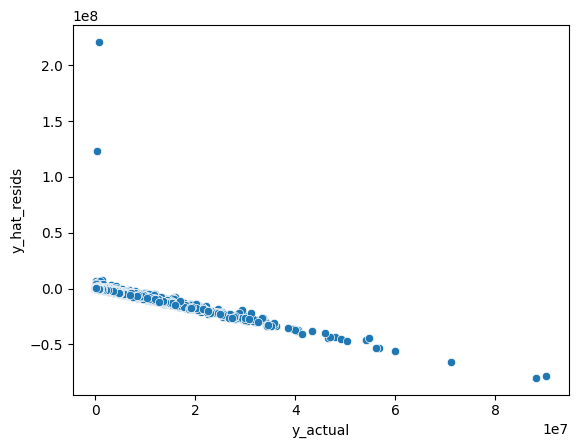

In [9]:
sns.scatterplot(data = preds, x = 'y_actual', y = 'y_hat_resids')
plt.show()

<div class="alert alert-block alert-info">

4. Calculate the sum of squared errors (SSE), explained sum of squares (ESS), total sum of squares (TSS), mean squared error (MSE), and root mean squared error (RSME) for your model.


Sum of Squared Errors (SSE)

SSE = the sum of all the residuals

In [10]:
# y-hat resids calc
# for SSE we calculate the residuals of the predictions minus(-) the actual home values
preds['y_hat_resids'] = preds['y_hat'] - preds['y_actual']

preds.head()

,y_actual,y_baseline,y_baseline_minus_mean,y_hat,y_hat_resids
1007466,241012,328010.5,-132489.819855,364907.314578,123895.314578
615622,235630,328010.5,-132489.819855,320717.233800,85087.233800
662507,435123,328010.5,-132489.819855,363744.417716,-71378.582284
840040,268770,328010.5,-132489.819855,353510.925325,84740.925325
243798,365000,328010.5,-132489.819855,365837.632068,837.632068


In [11]:
# Now we square said residuals
preds['y_hat_resids_sq'] = preds['y_hat_resids'] ** 2
preds.head()

,y_actual,y_baseline,y_baseline_minus_mean,y_hat,y_hat_resids,y_hat_resids_sq
1007466,241012,328010.5,-132489.819855,364907.314578,123895.314578,1.535005e+10
615622,235630,328010.5,-132489.819855,320717.233800,85087.233800,7.239837e+09
662507,435123,328010.5,-132489.819855,363744.417716,-71378.582284,5.094902e+09
840040,268770,328010.5,-132489.819855,353510.925325,84740.925325,7.181024e+09
243798,365000,328010.5,-132489.819855,365837.632068,837.632068,7.016275e+05


In [12]:
# Then we add all the squared residuals to get the SSE
sse_model = preds['y_hat_resids_sq'].sum()
sse_model

5.52302163507663e+17

Explained Sum of Squares (ESS)

ESS = The sum of (model prediction minus(-) the mean of actual home value)

In [13]:
# first lets calculate the prediction minus(-) actual
preds['y_hat_minus_mean'] = preds['y_hat'] - preds['y_actual'].mean()
preds.head()

,y_actual,y_baseline,y_baseline_minus_mean,y_hat,y_hat_resids,y_hat_resids_sq,y_hat_minus_mean
1007466,241012,328010.5,-132489.819855,364907.314578,123895.314578,1.535005e+10,-95593.005277
615622,235630,328010.5,-132489.819855,320717.233800,85087.233800,7.239837e+09,-139783.086055
662507,435123,328010.5,-132489.819855,363744.417716,-71378.582284,5.094902e+09,-96755.902139
840040,268770,328010.5,-132489.819855,353510.925325,84740.925325,7.181024e+09,-106989.394530
243798,365000,328010.5,-132489.819855,365837.632068,837.632068,7.016275e+05,-94662.687787


In [14]:
# lets add the new column then square it to get ESS
ess_model = sum(preds['y_hat_minus_mean'] ** 2)
ess_model

1.4003456268381235e+17

Total Sum of Squares (TSS)

TSS = sum of (actual home value (-) mean of all actual values)

Alternate TSS calculation

TSS = SSE + ESS

In [15]:
tss_model = sse_model + ess_model
tss_model

6.923367261914753e+17

Mean Squared Error (MSE)

Divide SSE by number of observations

In [16]:
mse_model = sse_model/len(df)
mse_model

258056785122.97153

Root Mean Squared Error (RMSE)



In [17]:
rmse_model = sqrt(mse_model)
rmse_model

507992.8986934478

<div class="alert alert-block alert-info">

5. Calculate the sum of squared errors (SSE), mean squared error (MSE), and root mean squared error (RMSE) for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).


In [18]:
preds['y_baseline_resids'] = preds['y_baseline'] - preds['y_actual']
preds.head()

,y_actual,y_baseline,y_baseline_minus_mean,y_hat,y_hat_resids,y_hat_resids_sq,y_hat_minus_mean,y_baseline_resids
1007466,241012,328010.5,-132489.819855,364907.314578,123895.314578,1.535005e+10,-95593.005277,86998.5
615622,235630,328010.5,-132489.819855,320717.233800,85087.233800,7.239837e+09,-139783.086055,92380.5
662507,435123,328010.5,-132489.819855,363744.417716,-71378.582284,5.094902e+09,-96755.902139,-107112.5
840040,268770,328010.5,-132489.819855,353510.925325,84740.925325,7.181024e+09,-106989.394530,59240.5
243798,365000,328010.5,-132489.819855,365837.632068,837.632068,7.016275e+05,-94662.687787,-36989.5


In [19]:
preds['y_baseline_resids_sq'] = preds['y_baseline_resids'] ** 2
preds.head()

,y_actual,y_baseline,y_baseline_minus_mean,y_hat,y_hat_resids,y_hat_resids_sq,y_hat_minus_mean,y_baseline_resids,y_baseline_resids_sq
1007466,241012,328010.5,-132489.819855,364907.314578,123895.314578,1.535005e+10,-95593.005277,86998.5,7.568739e+09
615622,235630,328010.5,-132489.819855,320717.233800,85087.233800,7.239837e+09,-139783.086055,92380.5,8.534157e+09
662507,435123,328010.5,-132489.819855,363744.417716,-71378.582284,5.094902e+09,-96755.902139,-107112.5,1.147309e+10
840040,268770,328010.5,-132489.819855,353510.925325,84740.925325,7.181024e+09,-106989.394530,59240.5,3.509437e+09
243798,365000,328010.5,-132489.819855,365837.632068,837.632068,7.016275e+05,-94662.687787,-36989.5,1.368223e+09


In [20]:
sse_baseline = preds['y_baseline_resids_sq'].sum()
sse_baseline

7.186348264170656e+17

In [21]:
mse_baseline = sse_baseline / len(preds)
mse_baseline

479677008936.9826

In [22]:
rmse_baseline = sqrt(mse_baseline)
rmse_baseline

692587.1850799599

<div class="alert alert-block alert-info">

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.


In [23]:
if sse_baseline > sse_model:
    print(f'Good, SSE of our finely tuned model: {round(sse_model)} beat the baseline {round(sse_baseline)}')
else:
    print(f'Bad, SSE of our baseline: {round(sse_baseline)} beat the tuned model: {round(sse_model)}')

Good, SSE of our finely tuned model: 552302163507662976 beat the baseline 718634826417065600


<div class="alert alert-block alert-info">

7. What is the amount of variance explained in your model?


In [24]:
r_model = ess_model / tss_model
r_model

0.20226366359926984

In [25]:
print('R-squared = ',round(r_model,3))
print("Percent of variance in y explained by x = ", round(r_model*100,1), "%")

R-squared =  0.202
Percent of variance in y explained by x =  20.2 %


In [26]:
# Alternate method to calculate R^2 using sklearn explained_variance_score
evs = explained_variance_score(preds.y_actual, preds.y_hat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.202


<div class="alert alert-block alert-info">

8. Is your model better than the baseline model?




Yes

SSE of our finely tuned model: 552302163507662976 beat the baseline 718634826417065600

<div class="alert alert-block alert-info">

9. Create a file named evaluate.py that contains the following functions.
    * plot_residuals(y, yhat): creates a residual plot
        * regression_errors(y, yhat): returns the following values:
        * sum of squared errors (SSE)
        * explained sum of squares (ESS)
        * total sum of squares (TSS)
        * mean squared error (MSE)
        * root mean squared error (RMSE)
    * baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
    * better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [27]:
X_train, y_train, X_val, y_va = create_model(train, val)

In [28]:
preds, lr = dataframe_model(X_train, y_train)

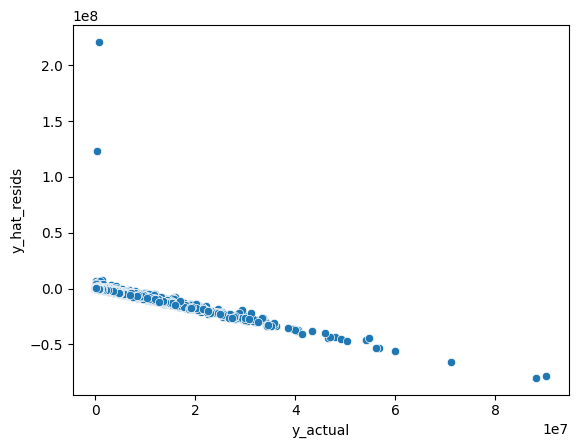

In [29]:
plot_residuals(preds)

In [30]:
sse_model, ess_model, tss_model, rmse_model = regression_errors(preds)

SSE:552302163507662976.000, ESS:140034562683812352.000, TSS:692336726191475328.000, RMSE:607167.747


In [31]:
sse_baseline, ess_baseline, tss_baseline, rmse_baseline = baseline_mean_errors(preds)

SSE:718634826417065600.000, ESS:26298100225424732.000, TSS:744932926642490368.000, RMSE:692587.185


In [32]:
better_than_baseline(preds)

Good, SSE of our finely tuned model: 552302163507662976 beat the baseline 718634826417065600
